# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *B*

**Names:**

* ASSAYAG Nathaniel
* DUCOURAU Maxime
* JORDAN Clémentine
* TRIOMPHE Achille

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.3 Epdemics

#### Exercise 2.9: Simulate an epidemic outbreak

Epidemic stopped after 100.27 days | 100.27 days elapsed | 0.1% susceptible, 0.0% infected, 99.9% recovered


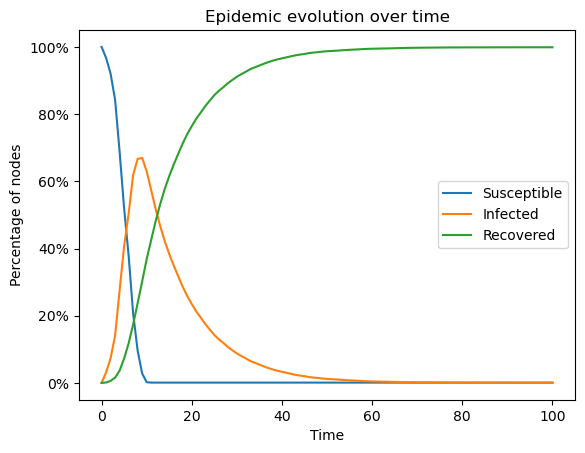

60% of the population is infected at day 7.
60% of the population is recovered at day 15.


TypeError: '_AxesStack' object is not callable

<Figure size 640x480 with 0 Axes>

In [23]:
""" 2.9.1: Simulation """ 

import epidemics_helper, networkx, json

with open('../data/nyc_augmented_network.json') as file:
    data = json.load(file)
    G = networkx.readwrite.json_graph.node_link_graph(data)

## Parameters: 
beta = 10.0
gamma = 0.1
max_time = 100.0

sir = epidemics_helper.SimulationSIR(G, beta, gamma)
sir.launch_epidemic(source=23654, max_time=max_time)

""" 2.9.2: Plotting the epidemic curve"""

import numpy as np, matplotlib.pyplot as plt, matplotlib.ticker as ticker

inf_times = sir.inf_time
rec_times = sir.rec_time



s_percentage = np.zeros(int(max_time + 1))
i_percentage = np.zeros(int(max_time + 1))
r_percentage = np.zeros(int(max_time + 1))

for time in range(int(max_time + 1)):

    nodes_number = G.number_of_nodes()

    s_percentage[time] = len([node for node in G.nodes() if sir.inf_time[node] > time and sir.rec_time[node] > time]) / nodes_number
    i_percentage[time] = len([node for node in G.nodes() if sir.inf_time[node] <= time and sir.rec_time[node] > time]) / nodes_number
    r_percentage[time] = len([node for node in G.nodes() if sir.rec_time[node] <= time]) / nodes_number

plt.plot(np.arange(max_time + 1), s_percentage, label='Susceptible')
plt.plot(np.arange(max_time + 1), i_percentage, label='Infected')
plt.plot(np.arange(max_time + 1), r_percentage, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Percentage of nodes')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
plt.legend()
plt.title('Epidemic evolution over time')
plt.show()

""" 2.9.3: Questions """

for time in range(int(max_time + 1)):
    if i_percentage[time] > 0.6:
        print(f'60% of the population is infected at day {time}.')
        break

for time in range(int(max_time + 1)):
    if r_percentage[time] > 0.6:
        print(f'60% of the population is recovered at day {time}.')
        break

"""2.9.4: Use the coordinates of the nodes to visualize the graph. Show susceptible, infected and
recovered nodes in different colors to differentiate them. How does the graph look like
on day 1? day 3? day 30?"""

node_coordinates = {node['id']: tuple(node['coordinates']) for node in data['nodes']}

for day in [1, 3, 30]:
    G_copy = G.copy()
    
    node_colors = []
    for node_id in G_copy.nodes():
        status = sir.get_node_status(node_id, day)
        if status == 0: 
            node_colors.append('blue')
        elif status == 1:
            node_colors.append('red')
        elif status == 2:
            node_colors.append('green')

    # Draw the graph with updated node colors
    networkx.draw(G_copy, pos=node_coordinates, node_color=node_colors, with_labels=False)
    plt.title(f'Graph on Day {day}')
    plt.show()


---

### 2.3.1 Stop the apocalypse!

#### Exercise 2.10: Strategy 1

#### Exercise 2.11: Strategy 2